In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import ToTensor, ToPILImage

from PIL import Image

# Define the edge detection model
class EdgeDetectionModel(nn.Module):
    def __init__(self):
        super(EdgeDetectionModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 1, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        return x

# Load the image
image_path = './image.jpeg'
image = Image.open(image_path).convert('RGB')
image_tensor = ToTensor()(image).unsqueeze(0)

# Create an instance of the edge detection model
model = EdgeDetectionModel()

# Apply edge detection to the image
with torch.no_grad():
    output = model(image_tensor)

# Convert the output tensor to an image
output_image = ToPILImage()(output.squeeze(0))

# Display the original and edge-detected images
image.show()
output_image.show()


In [2]:
import torchvision

In [7]:
import torch
from PIL import Image

# Load the image using PIL
image_path = 'image.jpeg'
image = Image.open(image_path)

# Preprocess the image (e.g., resize, normalize, etc.)
preprocess = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.1, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
preprocessed_image = preprocess(image)

# Add batch dimension to the image tensor
input_tensor = torch.unsqueeze(preprocessed_image, 0)

# Print the shape of the input tensor
print(input_tensor.shape)


torch.Size([1, 3, 224, 224])


In [5]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


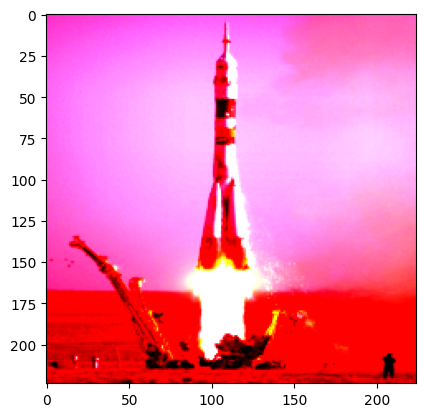

In [8]:
plt.imshow(preprocessed_image.permute(1, 2, 0).numpy())  